# Calendar

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
calendar_jun = pd.read_csv('https://data.insideairbnb.com/germany/be/berlin/2024-06-22/data/calendar.csv.gz')
calendar_mar = pd.read_csv('https://data.insideairbnb.com/germany/be/berlin/2024-03-24/data/calendar.csv.gz')
calendar_dec = pd.read_csv('https://data.insideairbnb.com/germany/be/berlin/2023-12-18/data/calendar.csv.gz')


In [4]:
concatenated = pd.concat([calendar_jun, calendar_mar, calendar_dec])


In [5]:
calendario = concatenated.drop_duplicates(subset=['listing_id', 'date'], keep='first')


In [6]:
calendario.to_csv('calendario.csv', index=False)


In [7]:
calendario.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8082400 entries, 0 to 4863721
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  float64
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 493.3+ MB


In [8]:
calendario.head()


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3176,2024-06-23,f,$105.00,NaN,63.0,365.0
1,3176,2024-06-24,f,$105.00,NaN,63.0,365.0
2,3176,2024-06-25,f,$105.00,NaN,63.0,365.0
3,3176,2024-06-26,f,$105.00,NaN,63.0,365.0
4,3176,2024-06-27,f,$105.00,NaN,63.0,365.0


In [9]:
calendario.isnull().sum()


listing_id              0
date                    0
available               0
price                   0
adjusted_price    8082400
minimum_nights          3
maximum_nights          3
dtype: int64

In [10]:
calendario['available'].value_counts()


available
f    5239389
t    2843011
Name: count, dtype: int64

In [11]:
calendario = calendario.drop(columns=['adjusted_price'])


In [12]:

calendario['date'] = pd.to_datetime(calendario['date'])


years = calendario['date'].dt.year.unique()


print(f"Tenemos registros de los siguientes años: {years}")


Tenemos registros de los siguientes años: [2024 2025 2023]


In [13]:
first_date = calendario['date'].min()
print(f"La primera fecha de registro es: {first_date}")


La primera fecha de registro es: 2023-12-18 00:00:00


In [14]:
last_date = calendario['date'].max()
print(f"La última fecha de registro es: {last_date}")


La última fecha de registro es: 2025-06-22 00:00:00


In [15]:
available_t = calendario[calendario['available'] == 't']
print(available_t)


                  listing_id       date available    price  minimum_nights  \
44                      3176 2024-08-06         t  $105.00            63.0   
45                      3176 2024-08-07         t  $105.00            63.0   
46                      3176 2024-08-08         t  $105.00            63.0   
47                      3176 2024-08-09         t  $105.00            63.0   
48                      3176 2024-08-10         t  $105.00            63.0   
...                      ...        ...       ...      ...             ...   
4863717  1049081468356551619 2024-03-20         t   $76.00             3.0   
4863718  1049081468356551619 2024-03-21         t   $76.00             3.0   
4863719  1049081468356551619 2024-03-22         t   $76.00             3.0   
4863720  1049081468356551619 2024-03-23         t   $76.00             3.0   
4863721  1049081468356551619 2024-03-24         t   $76.00             3.0   

         maximum_nights  
44                365.0  
45         

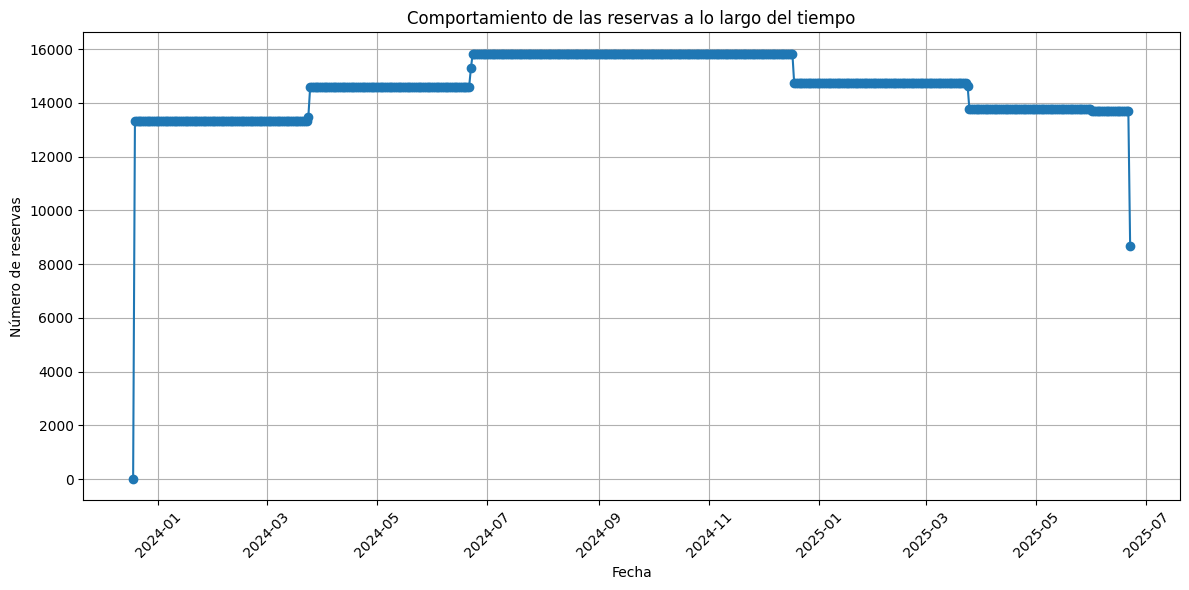

In [16]:
# Contar el número de reservas por fecha
reservas_por_fecha = calendario['date'].value_counts().sort_index()

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.plot(reservas_por_fecha.index, reservas_por_fecha.values, marker='o', linestyle='-')
plt.title('Comportamiento de las reservas a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de reservas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
# Agrupar por año y mes y contar el número de reservas
reservas_por_mes = calendario.groupby(calendario['date'].dt.to_period('M')).size()

# Convertir a DataFrame para una mejor visualización
reservas_por_mes = reservas_por_mes.to_frame(name='numero_reservas').reset_index()

# Mostrar el resultado
print(reservas_por_mes)


       date  numero_reservas
0   2023-12           173252
1   2024-01           413106
2   2024-02           386454
3   2024-03           421983
4   2024-04           437220
5   2024-05           451794
6   2024-06           447971
7   2024-07           490730
8   2024-08           490730
9   2024-09           474900
10  2024-10           490730
11  2024-11           474900
12  2024-12           475203
13  2025-01           456351
14  2025-02           412188
15  2025-03           449535
16  2025-04           412770
17  2025-05           426529
18  2025-06           296054


In [18]:
first_date_available = available_t['date'].min()
last_date_available = available_t['date'].max()
print(f"La primera fecha de registro disponible es: {first_date_available} y la última es: {last_date_available}")


La primera fecha de registro disponible es: 2023-12-18 00:00:00 y la última es: 2025-06-22 00:00:00


In [19]:
# Convert price to numeric, removing any non-numeric characters
calendario['price'] = calendario['price'].replace('[\$,]', '', regex=True).astype(float)

# Group by listing_id and calculate the percentage change in price
price_changes = calendario.groupby('listing_id')['price'].agg(['first', 'last'])
price_changes['percentage_change'] = ((price_changes['last'] - price_changes['first']) / price_changes['first']) * 100

# Filter out listings that have not changed their price
price_changes = price_changes[price_changes['percentage_change'] != 0]

print(price_changes)


                     first   last  percentage_change
listing_id                                          
57049                290.0  280.0          -3.448276
64590                120.0  139.0          15.833333
72079                118.0   80.0         -32.203390
85560                110.0   89.0         -19.090909
147339               100.0   59.0         -41.000000
...                    ...    ...                ...
1117369084980481851   35.0   40.0          14.285714
1117418824135366013  219.0  267.0          21.917808
1117509448814102951   55.0   45.0         -18.181818
1117887447208102363  190.0  160.0         -15.789474
1117897638651797664  116.0  130.0          12.068966

[1972 rows x 3 columns]


In [20]:
# Contar el número de reservas por listing_id en el dataframe calendario
reservas_por_listing = calendario['listing_id'].value_counts().reset_index()
reservas_por_listing.columns = ['listing_id', 'numero_reservas']

# Unir la tabla de reservas con la tabla de cambios de precio
tabla_final = reservas_por_listing.merge(price_changes, on='listing_id', how='inner')

# Ordenar la tabla por número de reservas
tabla_final = tabla_final.sort_values(by='numero_reservas', ascending=False)

print(tabla_final)


               listing_id  numero_reservas  first   last  percentage_change
931                242794              552  165.0  150.0          -9.090909
930                221015              552   85.0   75.0         -11.764706
929              49536102              552  500.0  350.0         -30.000000
928                192499              552   70.0   55.0         -21.428571
31                 620013              552   50.0   60.0          20.000000
...                   ...              ...    ...    ...                ...
1935  1065750598125434517              454  250.0  200.0         -20.000000
1936   641008169890384389              454  220.0  215.0          -2.272727
1937  1044620294834434360              454  150.0  130.0         -13.333333
1938  1068269469539089324              454  180.0  200.0          11.111111
1939             30059792              454  330.0   89.0         -73.030303

[1972 rows x 5 columns]


In [21]:
calendario[calendario['listing_id'] == 533864].describe()


,listing_id,date,price,minimum_nights,maximum_nights
count,552.0,552,552.0,552.000000,552.0
mean,533864.0,2024-09-19 12:00:00,129.0,4.039855,30.0
min,533864.0,2023-12-19 00:00:00,129.0,4.000000,30.0
25%,533864.0,2024-05-04 18:00:00,129.0,4.000000,30.0
50%,533864.0,2024-09-19 12:00:00,129.0,4.000000,30.0
75%,533864.0,2025-02-04 06:00:00,129.0,4.000000,30.0
max,533864.0,2025-06-22 00:00:00,129.0,6.000000,30.0
std,0.0,NaN,0.0,0.279756,0.0


In [22]:
calendario.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8082400 entries, 0 to 4863721
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           float64       
 4   minimum_nights  float64       
 5   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 431.6+ MB


In [ ]:


# Convertir la columna 'available' a booleano si no lo está
calendario['available'] = calendario['available'].apply(lambda x: True if x == 't' else False)

# Filtrar los listing_id que tienen al menos un valor True en 'available'
listings_with_true = calendario[calendario['available']].listing_id.unique()

# Filtrar el DataFrame para mantener solo los listing_id que tienen al menos un valor True en 'available'
calendario_filtered = calendario[calendario['listing_id'].isin(listings_with_true)].copy()

# Mostrar los resultados
print(calendario_filtered)


                  listing_id       date  available  price  minimum_nights  \
0                       3176 2024-06-23      False  105.0            63.0   
1                       3176 2024-06-24      False  105.0            63.0   
2                       3176 2024-06-25      False  105.0            63.0   
3                       3176 2024-06-26      False  105.0            63.0   
4                       3176 2024-06-27      False  105.0            63.0   
...                      ...        ...        ...    ...             ...   
4863717  1049081468356551619 2024-03-20       True   76.0             3.0   
4863718  1049081468356551619 2024-03-21       True   76.0             3.0   
4863719  1049081468356551619 2024-03-22       True   76.0             3.0   
4863720  1049081468356551619 2024-03-23       True   76.0             3.0   
4863721  1049081468356551619 2024-03-24       True   76.0             3.0   

         maximum_nights  
0                 365.0  
1                 365.0

In [24]:
calendario_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5904851 entries, 0 to 4863721
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       bool          
 3   price           float64       
 4   minimum_nights  float64       
 5   maximum_nights  float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1)
memory usage: 275.9 MB


Note: you may need to restart the kernel to use updated packages.


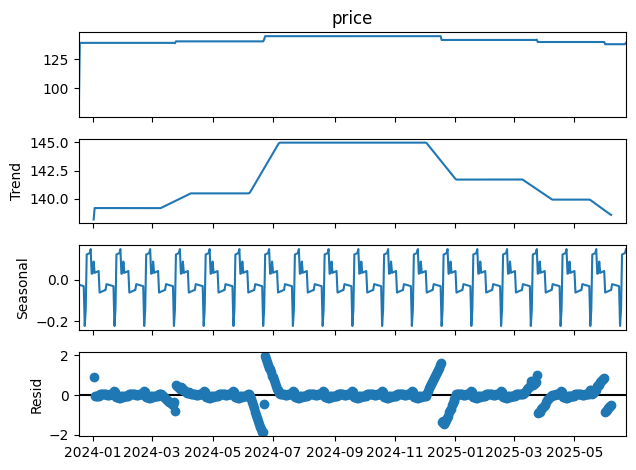

f:\Entono_Virtual\mi_entorno\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
f:\Entono_Virtual\mi_entorno\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                  553
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1290.064
Date:                            Mon, 09 Dec 2024   AIC                           2590.128
Time:                                    22:16:18   BIC                           2611.586
Sample:                                12-18-2023   HQIC                          2598.520
                                     - 06-22-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0055      1.988     -0.003      0.998      -3.902       3.891
ma.L1          0.1038      2.007   

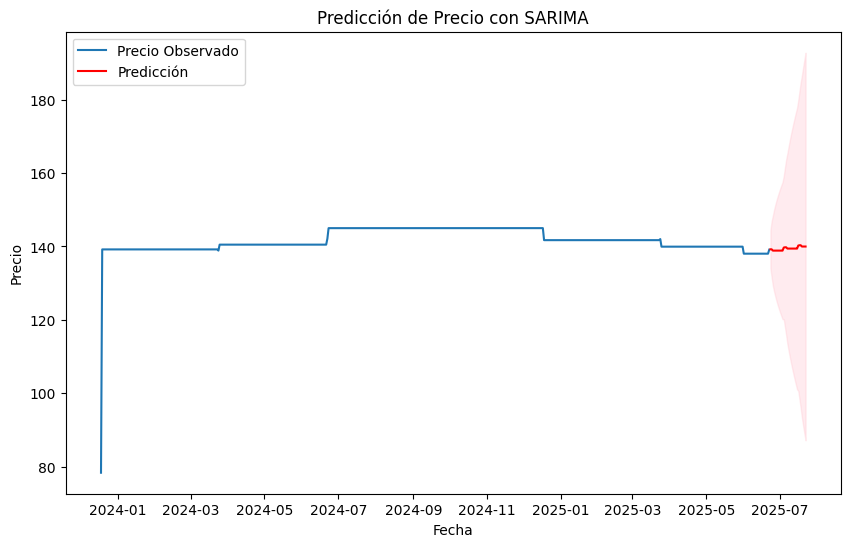

In [ ]:
%pip install statsmodels

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose





# Agrupar por 'date' y calcular el precio promedio
price_series = calendario.groupby('date')['price'].mean()

# Descomponer la serie temporal para visualizar componentes
decomposition = seasonal_decompose(price_series, model='additive', period=30)
decomposition.plot()
plt.show()

# Ajustar el modelo SARIMA
model = SARIMAX(price_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Mostrar el resumen del modelo
print(results.summary())

# Realizar predicciones
predictions = results.get_forecast(steps=30)
predicted_mean = predictions.predicted_mean
conf_int = predictions.conf_int()

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(price_series, label='Precio Observado')
plt.plot(predicted_mean, label='Predicción', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Predicción de Precio con SARIMA')
plt.legend()
plt.show()


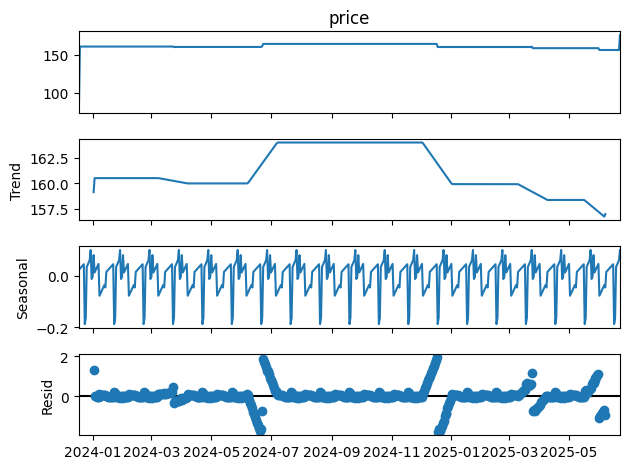

f:\Entono_Virtual\mi_entorno\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
f:\Entono_Virtual\mi_entorno\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                  553
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1465.768
Date:                            Mon, 09 Dec 2024   AIC                           2941.535
Time:                                    22:16:50   BIC                           2962.993
Sample:                                12-18-2023   HQIC                          2949.927
                                     - 06-22-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0023     29.960   -7.6e-05      1.000     -58.724      58.719
ma.L1          0.0423     30.008   

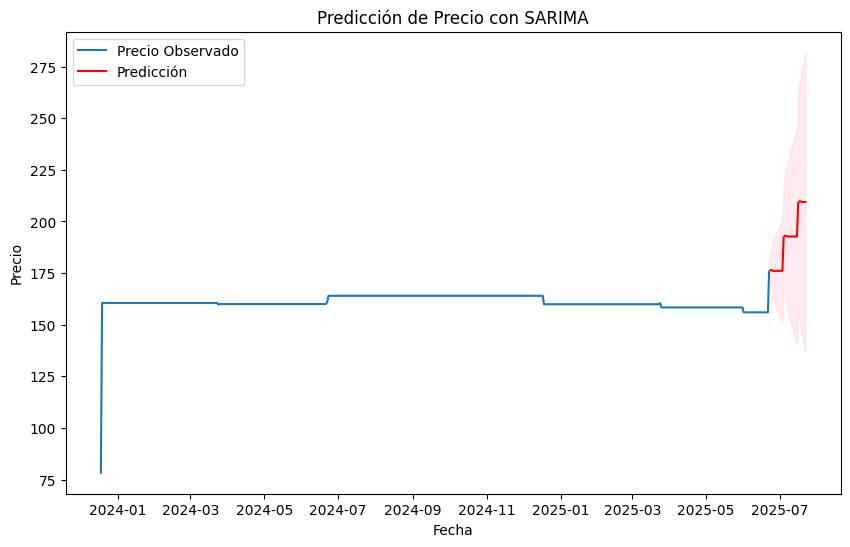

In [ ]:


# Agrupar por 'date' y calcular el precio promedio
price_series = calendario_filtered.groupby('date')['price'].mean()

# Descomponer la serie temporal para visualizar componentes
decomposition = seasonal_decompose(price_series, model='additive', period=30)
decomposition.plot()
plt.show()

# Ajustar el modelo SARIMA
model = SARIMAX(price_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Mostrar el resumen del modelo
print(results.summary())

# Realizar predicciones
predictions = results.get_forecast(steps=30)
predicted_mean = predictions.predicted_mean
conf_int = predictions.conf_int()

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(price_series, label='Precio Observado')
plt.plot(predicted_mean, label='Predicción', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Predicción de Precio con SARIMA')
plt.legend()
plt.show()


Note: you may need to restart the kernel to use updated packages.


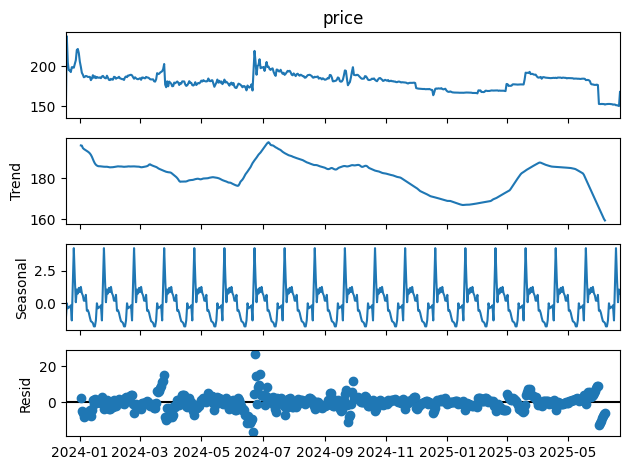

f:\Entono_Virtual\mi_entorno\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
f:\Entono_Virtual\mi_entorno\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                  553
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1683.086
Date:                            Mon, 09 Dec 2024   AIC                           3376.172
Time:                                    22:14:50   BIC                           3397.630
Sample:                                12-18-2023   HQIC                          3384.564
                                     - 06-22-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2190      0.058      3.764      0.000       0.105       0.333
ma.L1         -0.6648      0.054   

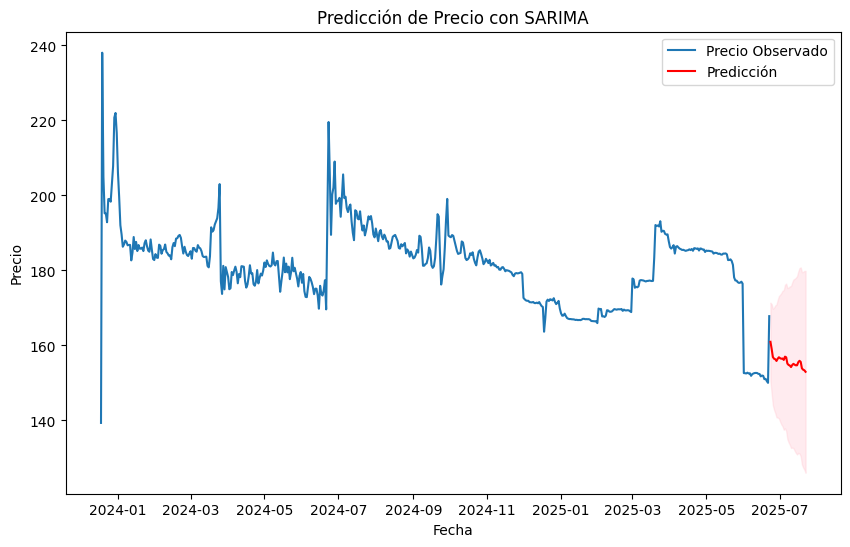

In [ ]:

# Filtrar los datos para 'available=True'
calendario_available = calendario[calendario['available'] == True]

# Agrupar por 'date' y calcular el precio promedio
price_series = calendario_available.groupby('date')['price'].mean()

# Descomponer la serie temporal para visualizar componentes
decomposition = seasonal_decompose(price_series, model='additive', period=30)
decomposition.plot()
plt.show()

# Ajustar el modelo SARIMA
model = SARIMAX(price_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Mostrar el resumen del modelo
print(results.summary())

# Realizar predicciones
predictions = results.get_forecast(steps=30)
predicted_mean = predictions.predicted_mean
conf_int = predictions.conf_int()

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(price_series, label='Precio Observado')
plt.plot(predicted_mean, label='Predicción', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Predicción de Precio con SARIMA')
plt.legend()
plt.show()
